#### ポアソン分布とは？

ポアソン分布は、ある間隔（時間や長さなど）の間に起こるイベントの回数に注目するものです。
まずは、その定義をみたあとに、その式の意味するところを噛み砕いていくことにしましょう。

離散確率変数Xが、パラメータλを持つポアソン分布に従うとき、k=0,1,2.., に対応する確率を生成する確率質量関数は、次の式で与えられます。

$$Pr(X=k)=\frac{\lambda^ke^{-\lambda}}{k!}$$

eは自然対数の底（ネイピア数）で、e=2.718...となる数です。k!はkの階乗。      

ポアソン分布には、次のような性質があります。

    1. 離散的です。(x=0,1,2,3...)
    1. この数は、0から無限大までの値を取り得ます。
    1. あまり頻繁には起こらない事象の確率分布を表現します。
    1. それぞれの事象は独立です。
    1. 時間や距離などの間隔で起きる事象について記述します。
    1. 事象が起きる回数の期待値は定数です。

例を見てみましょう。

マクドナルドのランチのピークは、12:30から1:00の間です。これまでの経験から、平均で10人のお客さんが、この時間帯に来店することが分かっています。それでは、ちょうど7人のお客さんが来店する確率はどれくらいでしょうか？また、10人より多いお客さんが来る確率はどれくらいでしょうか？

これまでの経験から、お昼のピーク30分間に、10人のお客さんが来ることがわかっています。この10は平均値、つまり期待値です。これはポアソン分布のパラメータλに相当します。

ポアソン分布はλが決まれば、決まりますので、この例題に答えることができます。やってみましょう。

In [1]:
# 残念ながら、lambdaはPythonでは予約語なので、そのまま変数名には使えます。

# lambとして、λをセットします。
lamb = 10

# ちょうど7人来る確率を計算したいので、k=7です。
k=7

# 標準mathモジュールから、必要なモノをインポート
from math import exp
from math import factorial

# 確率質量関数をつかって確率を計算します。
prob = (lamb**k)*exp(-lamb)/factorial(k)

print(f'昼のピーク時にお客さんが7人である確率は、{100*prob:0.2f}%です。')

昼のピーク時にお客さんが7人である確率は、9.01%です。


確率質量関数を手作りできました。scipyを使うともう少し楽です。

In [2]:
# scipy.statsから、 poissonをインポートします
from scipy.stats import poisson

# 平均は10です。
mu = 10

# 平均と分散を計算できます。
mean, var = poisson.stats(mu)

# 確率質量関数を使って、特定の確率を計算することも可能です。
odds_seven = poisson.pmf(7, mu)

print(f'ピーク時に7人の確率は{odds_seven*100:0.2f}％')

print(f'平均={mean}')

ピーク時に7人の確率は9.01％
平均=10.0


分布の全体を見ておくことにします。これは、10人よりお客が多い確率を求めるのに必要です。

In [3]:
# 確率質量関数をプロットしてみましょう。

import numpy as np

# ひとまず、30人のお客さんが来る確率です。理論的には無限大まであり得ます。
k=np.arange(30)

# 平均は10です。
lamb = 10

# これで確率を計算できます。
pmf_pois = poisson.pmf(k, lamb)
pmf_pois

array([4.53999298e-05, 4.53999298e-04, 2.26999649e-03, 7.56665496e-03,
       1.89166374e-02, 3.78332748e-02, 6.30554580e-02, 9.00792257e-02,
       1.12599032e-01, 1.25110036e-01, 1.25110036e-01, 1.13736396e-01,
       9.47803301e-02, 7.29079462e-02, 5.20771044e-02, 3.47180696e-02,
       2.16987935e-02, 1.27639962e-02, 7.09110899e-03, 3.73216263e-03,
       1.86608131e-03, 8.88610150e-04, 4.03913704e-04, 1.75614654e-04,
       7.31727725e-05, 2.92691090e-05, 1.12573496e-05, 4.16938875e-06,
       1.48906741e-06, 5.13471521e-07])

<BarContainer object of 30 artists>

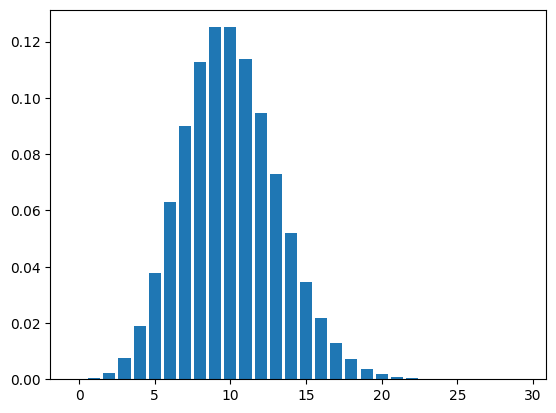

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.bar(k, pmf_pois)

10人より多くのお客さんがくる確率はどれくらいでしょうか？

これは、11人以降の確率の値をすべて足し合わせれば良いわけですが、これを実現するのが、累積分布関数（CDF: Cumulative Distribution Function）です。

累積分布関数は、指定された値までの確率を足し合わせた値を返してくれます。

In [5]:
# お客さんが10人までの確率を計算するので、k = 10です。平均値もおなじく10
k, mu = 10, 10

# お客さんが10人までの確率を次のコードで計算できます。
prob_up_to_ten = poisson.cdf(k, mu)

print(f'お客さんが10人までの確率は、{100*prob_up_to_ten:0.2f}%です。')

お客さんが10人までの確率は、58.30%です。


10により多く来る確率は、1からこの値を引くだけです。

In [7]:
prob_more_than_ten = 1 - prob_up_to_ten

print(f'10人より多くのお客さんが来る確率は、{100*prob_more_than_ten:0.2f}%です。')

10人より多くのお客さんが来る確率は、41.70%です。


-----

ポアソン分布の基本的なことを解説しました。
以下の資料も参考にしてみてください。

1. https://ja.wikipedia.org/wiki/%E3%83%9D%E3%82%A2%E3%82%BD%E3%83%B3%E5%88%86%E5%B8%83

1. https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.poisson.html